# Load Libraries

In [2]:
# Load library
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set up parameters for Basemap
lat0 = 21.8875
lat1 = 25.3125
lon0 = 120.0
lon1 = 122.0125

lats = np.arange(21.8875, 25.3125, 0.0125)
lons = np.arange(120.0, 122.0125, 0.0125)

# Load Data

In [3]:
# CWB station info
stdinfo = pd.read_csv('../examples/data/CWB_station_list_cleaned_20191204.csv')
stdinfo.head()
# CWB QPE
evcwb = pd.read_csv('cwb_qpe_eval_2016_wo_negatives.csv')
# Our QPE
evvtp = pd.read_csv('enclr_th-1_test.csv')
# Prepare data for visualization
cwb = pd.merge(stdinfo.loc[:,['id','elevation','lon','lat']], evcwb.loc[:,['id','rmse','corr']], on='id')
vtp = pd.merge(stdinfo.loc[:,['id','elevation','lon','lat']], evvtp.loc[:,['id','rmse','corr']], on='id')
comp = cwb.merge(evvtp.loc[:,['id','rmse','corr']], on='id', suffixes=('_cwb', '_vtp'))
#print(comp.head())
print(comp.describe())

         elevation         lon        lat   rmse_cwb   corr_cwb   rmse_vtp  \
count    45.000000   45.000000  45.000000  45.000000  45.000000  45.000000   
mean    170.568889  121.589260  25.053096   1.900078   0.577864   1.860891   
std     240.090615    0.155795   0.102089   0.433102   0.150301   0.423161   
min       6.000000  121.346300  24.776200   1.292644   0.237025   1.195070   
25%      26.700000  121.490400  24.993900   1.600036   0.481709   1.563278   
50%      55.000000  121.546300  25.055400   1.779267   0.582445   1.753280   
75%     241.000000  121.658800  25.117500   2.087012   0.713447   2.158389   
max    1079.000000  122.002100  25.263800   2.989705   0.812785   2.702821   

        corr_vtp  
count  45.000000  
mean    0.425661  
std     0.070664  
min     0.308230  
25%     0.360420  
50%     0.420456  
75%     0.491124  
max     0.555455  


# Mark Stations

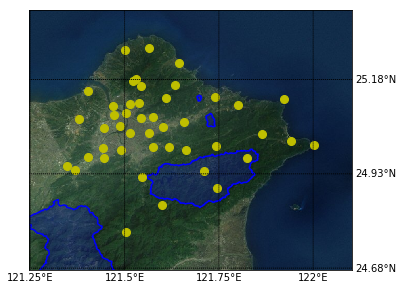

In [8]:
from mpl_toolkits.basemap import Basemap

lat0 = cwb['lat'].min() - 0.1
lat1 = cwb['lat'].max() + 0.1
lon0 = cwb['lon'].min() - 0.1
lon1 = cwb['lon'].max() + 0.1

#plt.figure(figsize=(6,6))
m = Basemap(llcrnrlon=lon0, urcrnrlon=lon1, llcrnrlat=lat0, urcrnrlat=lat1)#, resolution='l', epsg=3826)
m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels=800, verbose= False)

# Plot whatershed info
wca = m.readshapefile('../data/watershed_tw_2019/reswshed_2019', 'reswshed_2019', drawbounds=False)

#patches   = []

for info, shape in zip(m.reswshed_2019_info, m.reswshed_2019):
    #print(info)
    if info['NAME'] in ['翡翠水庫','石門水庫','西勢水庫','新山水庫']:
        #print(info)
        x, y = zip(*shape)
        m.plot(x, y, marker=None,color='b')
        plt.fill(x, y, facecolor='blue', alpha=0.2, edgecolor='none', linewidth=0.5, zorder=1)
        #patches.append(Polygon(np.array(shape), True) )

nrow, ncol = cwb.shape

for i in range(nrow):
    rec = cwb.iloc[i,:]
    m.plot(rec['lon'], rec['lat'], color='y', marker='o', markersize=8)

m.drawparallels(np.round(np.arange(lat0,lat1,0.25),2),labels=[0,1,0,1])
m.drawmeridians(np.round(np.arange(lon0,lon1,0.25),2),labels=[1,0,0,1])

#plt.title('45 CWB Stations in Taipei Area')
plt.tight_layout()
plt.show()

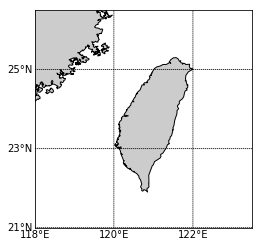

In [4]:
# Map of TW
lat0 = 21.0
lat1 = 26.5
lon0 = 118.0
lon1 = 123.5

#plt.figure(figsize=(6,6))
m = Basemap(llcrnrlon=lon0, urcrnrlon=lon1, llcrnrlat=lat0, urcrnrlat=lat1, resolution='i')
m.drawcoastlines()
m.fillcontinents()
m.drawparallels(np.arange(21.0,26.5,2),labels=[1,0,0,1])
m.drawmeridians(np.arange(118.0,123.5,2),labels=[1,0,0,1])
#plt.axis('off')

plt.show()

## Non-Contour Map

One reviewer suggested using dot instead of ocntour.

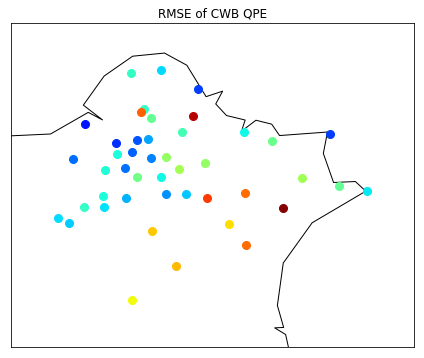

In [22]:
from mpl_toolkits.basemap import Basemap
# Define the corners

lat0 = cwb['lat'].min() - 0.1
lat1 = cwb['lat'].max() + 0.1
lon0 = cwb['lon'].min() - 0.1
lon1 = cwb['lon'].max() + 0.1

from scipy.interpolate import griddata
# Create the grid space
xtw = np.linspace(lon0,lon1,30)
ytw =  np.linspace(lat0,lat1,30)
Xtw, Ytw = np.meshgrid(xtw,ytw)

# Retrieve the station location and values
lons = cwb['lon']
lats = cwb['lat']
rmse = cwb['rmse']
rmsegrid = griddata((lons, lats), rmse, (Xtw, Ytw), method='linear', rescale=True)

#
plt.figure(figsize=(6,6))                           # Define the figure size
m = Basemap(llcrnrlon=lon0, urcrnrlon=lon1, llcrnrlat=lat0, urcrnrlat=lat1, resolution='i') # Make a map of East Asia
#m.contourf(Xtw, Ytw, rmsegrid, levels=np.arange(1,3,0.1), cmap=plt.cm.jet, alpha=1.0) # Draw a filled-contour plot with the interpolated grid data
#cb = m.colorbar()                                   # Show colorbar
#cb.set_label('mm/hr')


# Plot whatershed info
wca = m.readshapefile('../data/watershed_tw_2019/reswshed_2019', 'reswshed_2019', drawbounds=False)

#for info, shape in zip(m.reswshed_2019_info, m.reswshed_2019):
    #print(info)
#    if info['NAME'] in ['翡翠水庫']:
        #print(info)
#        x, y = zip(*shape)
#        m.plot(x, y, marker=None,color='b')
#        plt.fill(x, y, facecolor="none", alpha=0.1, hatch="/", edgecolor="k")

# Colormap
cmap=plt.cm.jet
cmin = 1.
cmax = 3.
values = cwb['rmse']
cs = cmap((values - cmin)/(cmax-cmin))

nrow, ncol = cwb.shape
for i in range(nrow):
    rec = cwb.iloc[i,:]
    m.plot(rec['lon'], rec['lat'], color=cs[i], marker='o', markersize=8)

m.drawcoastlines()                                  # Draw the coastlines

# Mark the stations
#for i in range(nrow):
#    rec = cwb.iloc[i,:]
#    m.plot(rec['lon'], rec['lat'], color='k', alpha=0.5, marker='o', markersize=4)

plt.title('RMSE of CWB QPE')                # Add colobar title
plt.tight_layout()
plt.show()

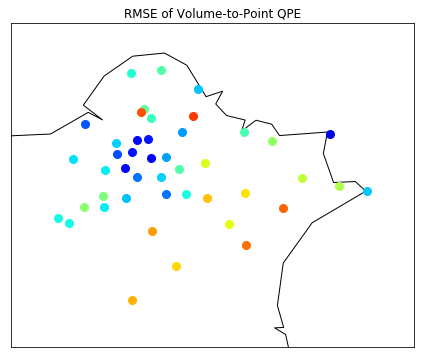

In [21]:
# Retrieve the station location and values
lons = vtp['lon']
lats = vtp['lat']
rmse = vtp['rmse']
rmsegrid = griddata((lons, lats), rmse, (Xtw, Ytw), method='linear', rescale=True)

#
plt.figure(figsize=(6,6))                           # Define the figure size
m = Basemap(llcrnrlon=lon0, urcrnrlon=lon1, llcrnrlat=lat0, urcrnrlat=lat1, resolution='i') # Make a map of East Asia
#m.contourf(Xtw, Ytw, rmsegrid, levels=np.arange(1,3,0.1), cmap=plt.cm.jet, alpha=1.0) # Draw a filled-contour plot with the interpolated grid data
#cb = m.colorbar()                                   # Show colorbar
#cb.set_label('mm/hr')


# Plot whatershed info
#wca = m.readshapefile('../data/watershed_tw_2019/reswshed_2019', 'reswshed_2019', drawbounds=False)

#for info, shape in zip(m.reswshed_2019_info, m.reswshed_2019):
    #print(info)
#    if info['NAME'] in ['翡翠水庫']:
        #print(info)
#        x, y = zip(*shape)
#        m.plot(x, y, marker=None,color='b')
#        plt.fill(x, y, facecolor="none", alpha=0.1, hatch="/", edgecolor="k")

# Colormap
cmap=plt.cm.jet
cmin = 1.
cmax = 3.
values = vtp['rmse']
cs = cmap((values - cmin)/(cmax-cmin))

nrow, ncol = cwb.shape
for i in range(nrow):
    rec = cwb.iloc[i,:]
    m.plot(rec['lon'], rec['lat'], color=cs[i], marker='o', markersize=8)

m.drawcoastlines()                                  # Draw the coastlines

# Mark the stations
#for i in range(nrow):
#    rec = cwb.iloc[i,:]
#    m.plot(rec['lon'], rec['lat'], color='k', alpha=0.5, marker='o', markersize=4)

plt.title('RMSE of Volume-to-Point QPE')                # Add colobar title
plt.tight_layout()
plt.show()

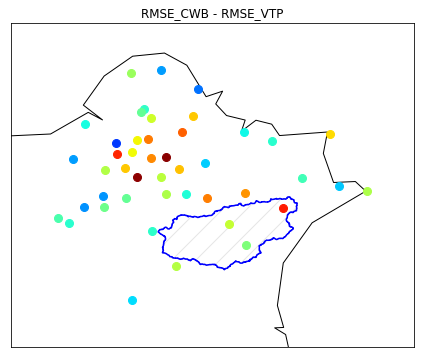

In [20]:
# Retrieve the station location and values
lons = vtp['lon']
lats = vtp['lat']
rmse = cwb['rmse'] - vtp['rmse']
rmsegrid = griddata((lons, lats), rmse, (Xtw, Ytw), method='linear', rescale=True)

#
plt.figure(figsize=(6,6))                           # Define the figure size
m = Basemap(llcrnrlon=lon0, urcrnrlon=lon1, llcrnrlat=lat0, urcrnrlat=lat1, resolution='i') # Make a map of East Asia
#m.contourf(Xtw, Ytw, rmsegrid, levels=np.arange(-0.5, 0.5, 0.05), cmap=plt.cm.jet) # Draw a filled-contour plot with the interpolated grid data
#cb = m.colorbar()                                   # Show colorbar
#cb.set_label('mm/hr')


# Plot whatershed info
wca = m.readshapefile('../data/watershed_tw_2019/reswshed_2019', 'reswshed_2019', drawbounds=False)

for info, shape in zip(m.reswshed_2019_info, m.reswshed_2019):
    #print(info)
    if info['NAME'] in ['翡翠水庫']:
        #print(info)
        x, y = zip(*shape)
        m.plot(x, y, marker=None,color='b')
        plt.fill(x, y, facecolor="none", alpha=0.1, hatch="/", edgecolor="k")

# Colormap
cmap=plt.cm.jet
cmin = -0.5
cmax = 0.5
values = cwb['rmse'] - vtp['rmse']
cs = cmap((values - cmin)/(cmax-cmin))

nrow, ncol = cwb.shape
for i in range(nrow):
    rec = cwb.iloc[i,:]
    m.plot(rec['lon'], rec['lat'], color=cs[i], marker='o', markersize=8)

m.drawcoastlines()                                  # Draw the coastlines

# Mark the stations
#for i in range(nrow):
#    rec = cwb.iloc[i,:]
#    m.plot(rec['lon'], rec['lat'], color='k', alpha=0.5, marker='o', markersize=4)

plt.title('RMSE_CWB - RMSE_VTP')                # Add colobar title
plt.tight_layout()
plt.show()